Import all needed packages and dataset "cancer"

In [ ]:
#import packages for all models
%matplotlib inline
import os
import sys
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import sklearn
import time
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

#import packages for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#improt packages for neural networks
import keras
import tensorflow as tf
from sklearn import model_selection

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

#improt packages for boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#improt packages for svm
from scipy import stats
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#improt packages for KNN
from sklearn.neighbors import KNeighborsClassifier

#import data 1 
cancer = pd.read_csv("/content/cancer.csv")
print(cancer)

#data cleaning for data 1
#convert sex to numeric
d = {'female': 2, 'male': 1}
cancer['sex'] = cancer['sex'].map(d)
#convert race to numeric
d = {'asian': 4, 'white': 1,'black': 3, 'hispanic': 2, 'other_mix': 5}
cancer['race'] = cancer['race'].map(d)
#convert drug group to numeric
d = {'treatment': 1, 'placebo': 0}
cancer['drug_group'] = cancer['drug_group'].map(d)
#convert other categoricals to numeric
d = {'T': 1, 'F': 0}
cancer['ever_smoke'] = cancer['ever_smoke'].map(d)
cancer['overweight'] = cancer['overweight'].map(d)
cancer['prior_rad'] = cancer['prior_rad'].map(d)
cancer['prior_chemo'] = cancer['prior_chemo'].map(d)

#drop NA
cancer = cancer.dropna(axis=0)

#print
print(cancer)

# transform data to numeric to enable further analysis
#data = data.apply(pd.to_numeric)
cancer.dtypes

Decision Tree Analysis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(100, 10)
(100,)
(80, 10)
(20, 10)


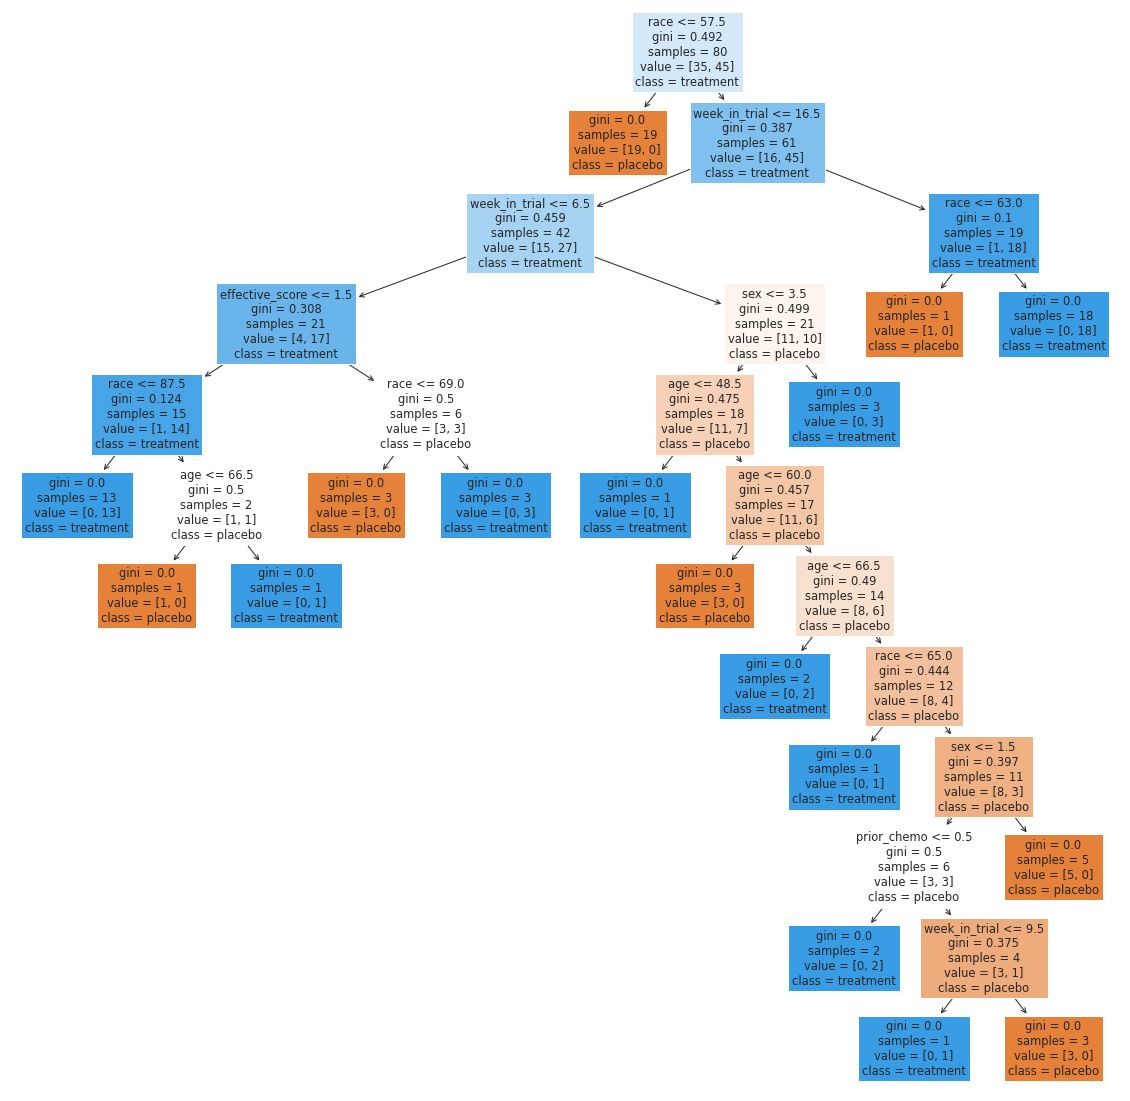

Train score 1.0
Test score 0.75
Train Confusion matrix


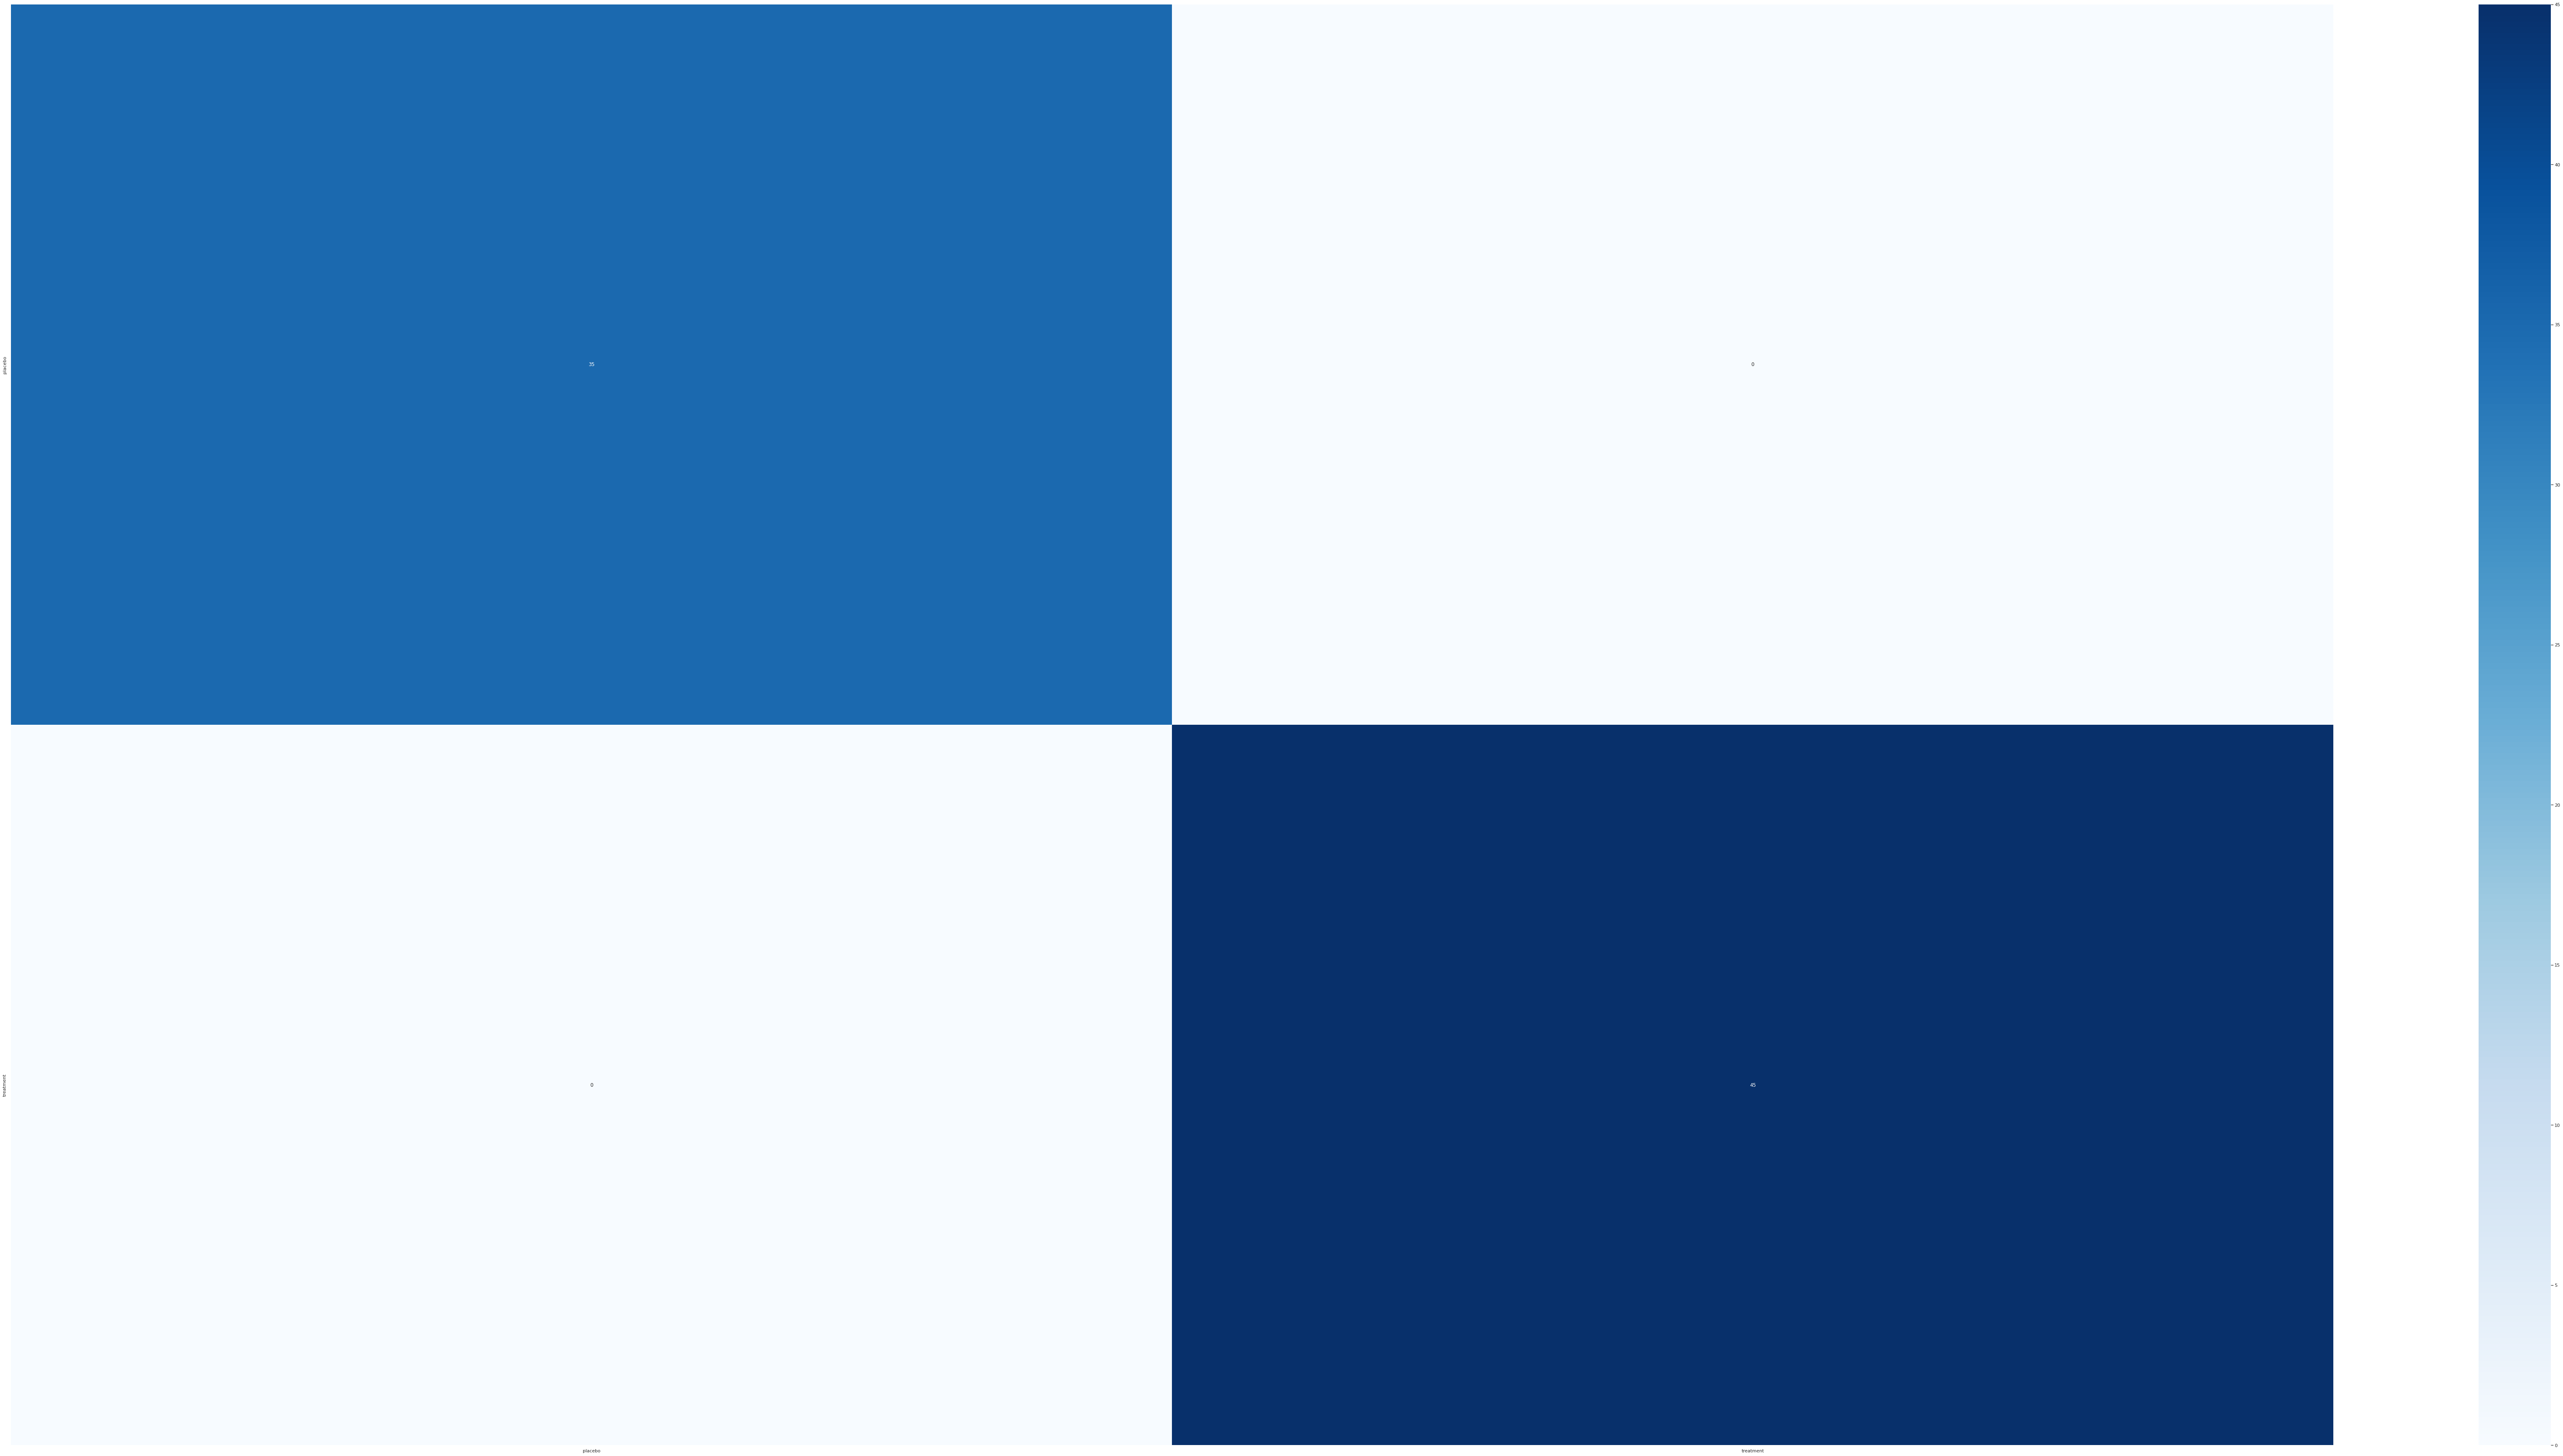

Test Confusion matrix


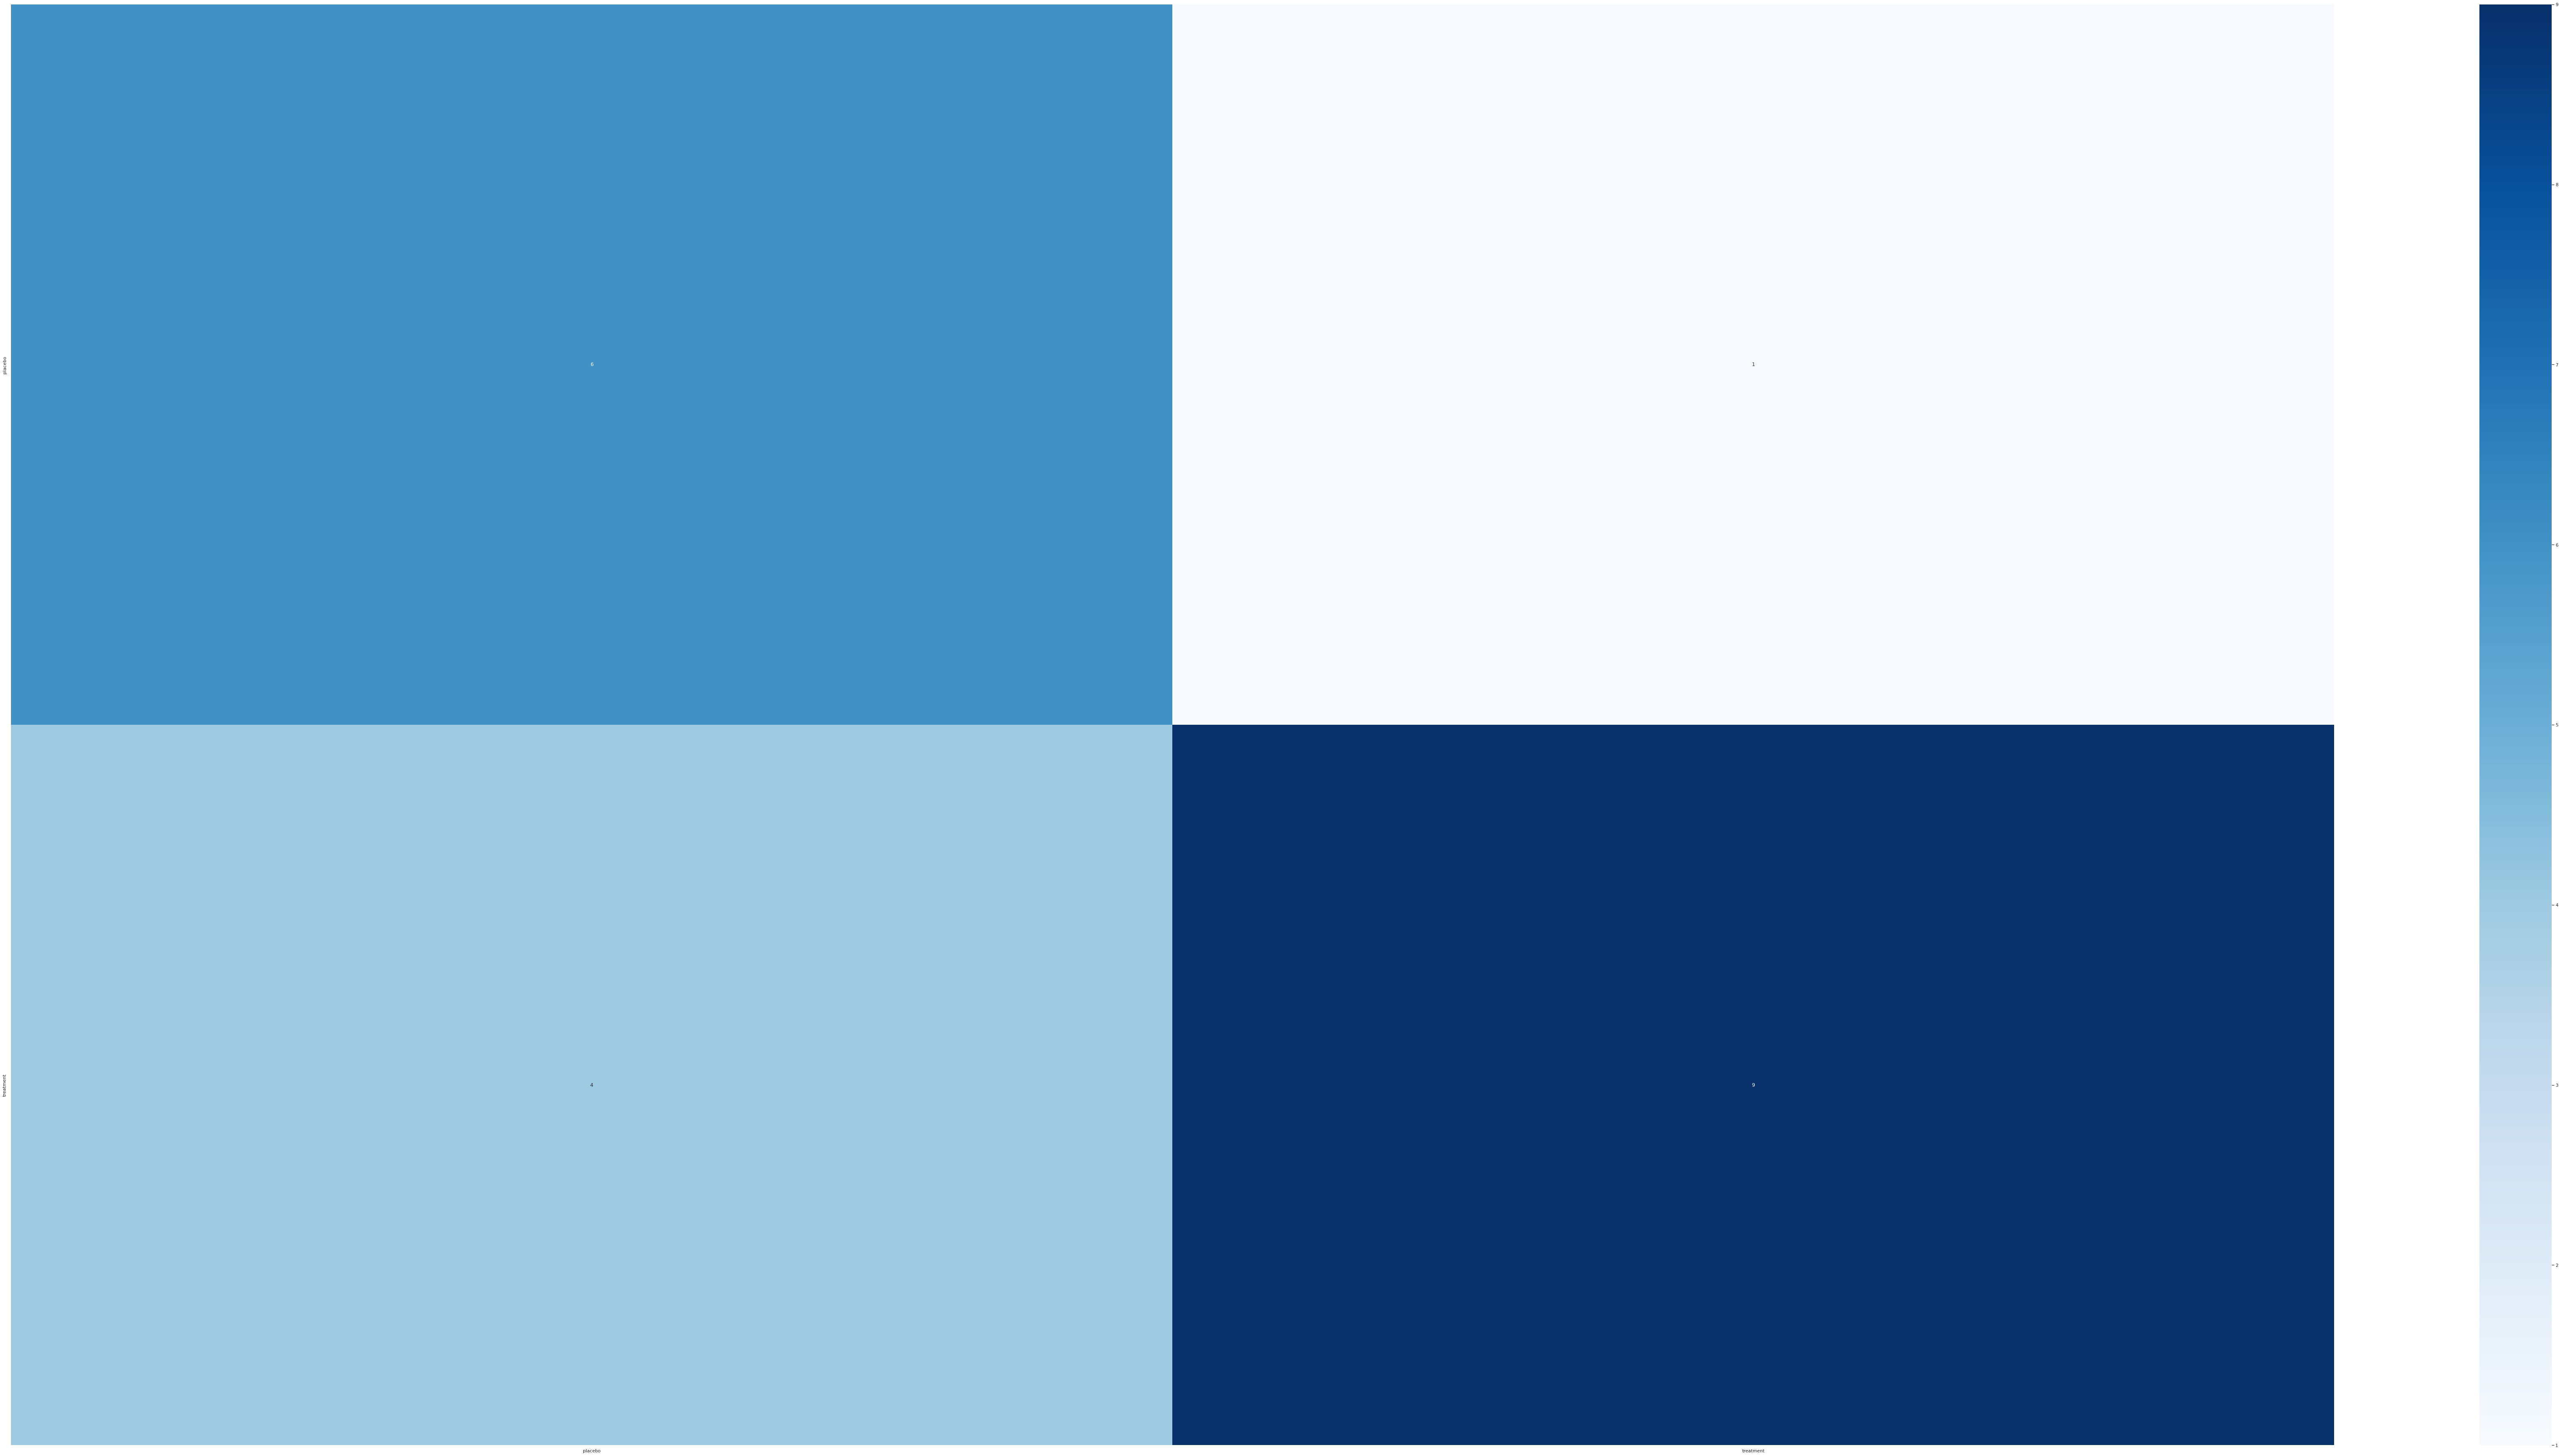

Train score 0.925
Test score 0.85
Train Confusion matrix


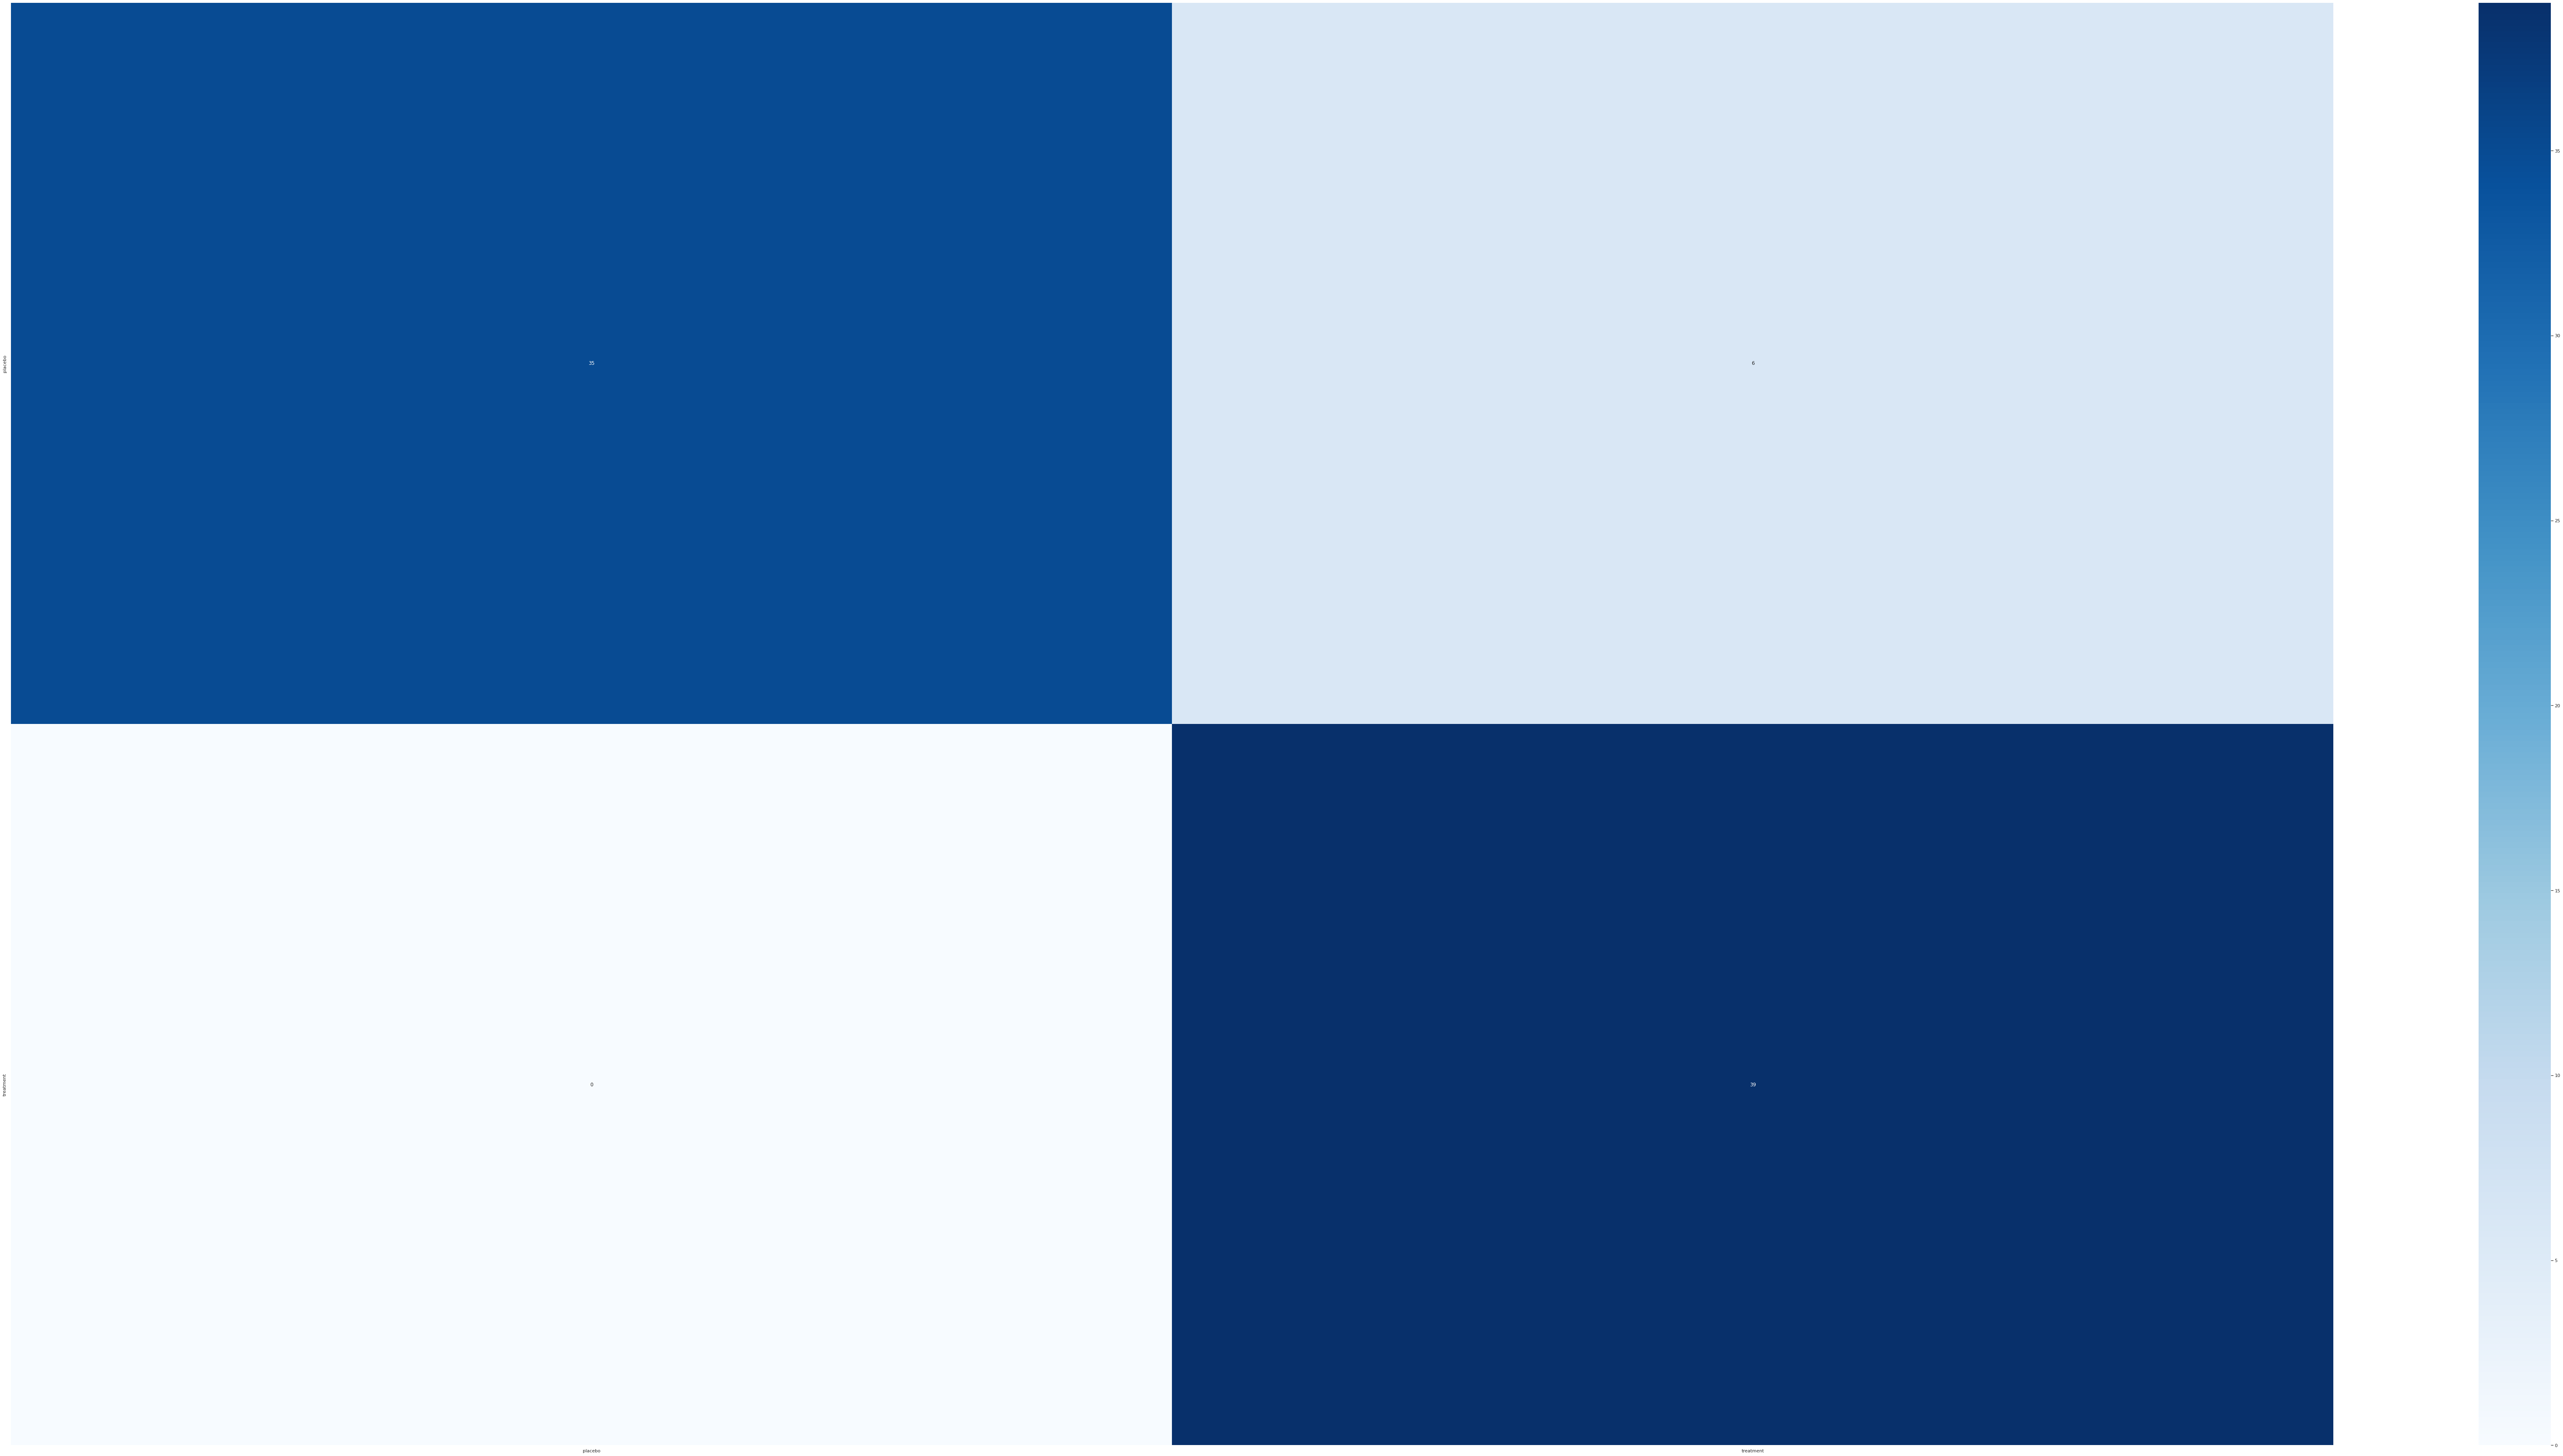

Test Confusion matrix


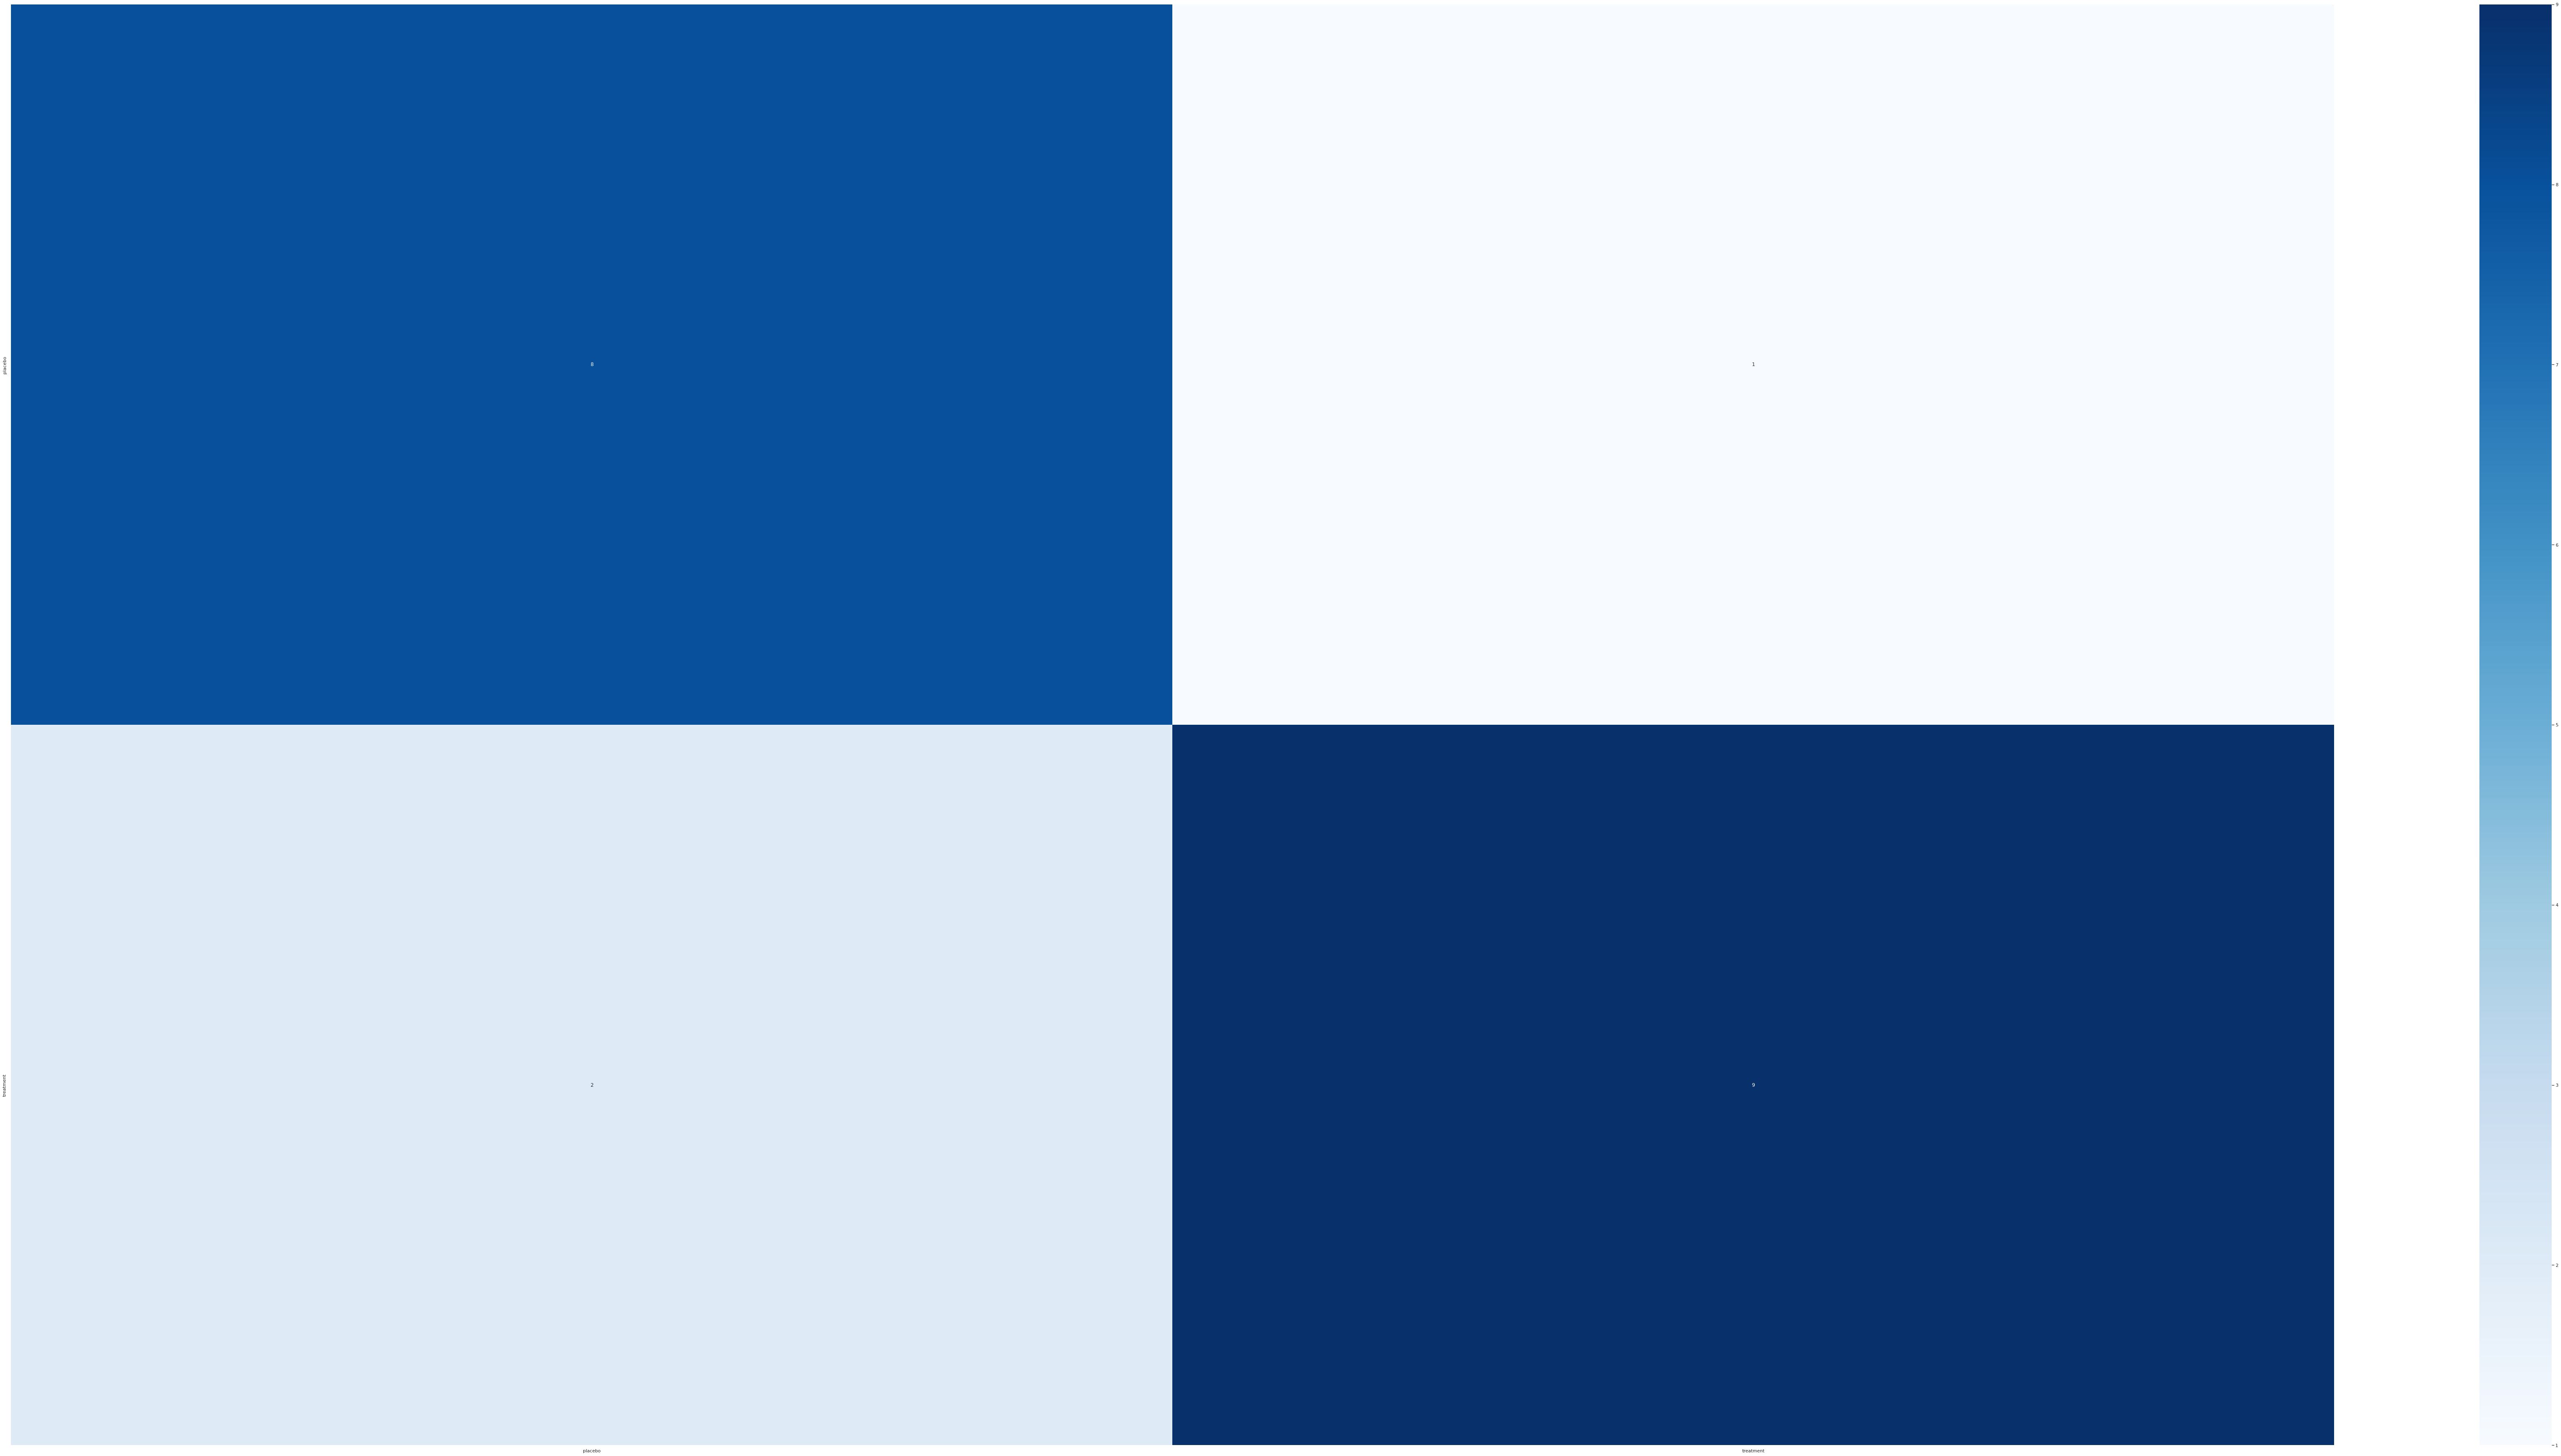

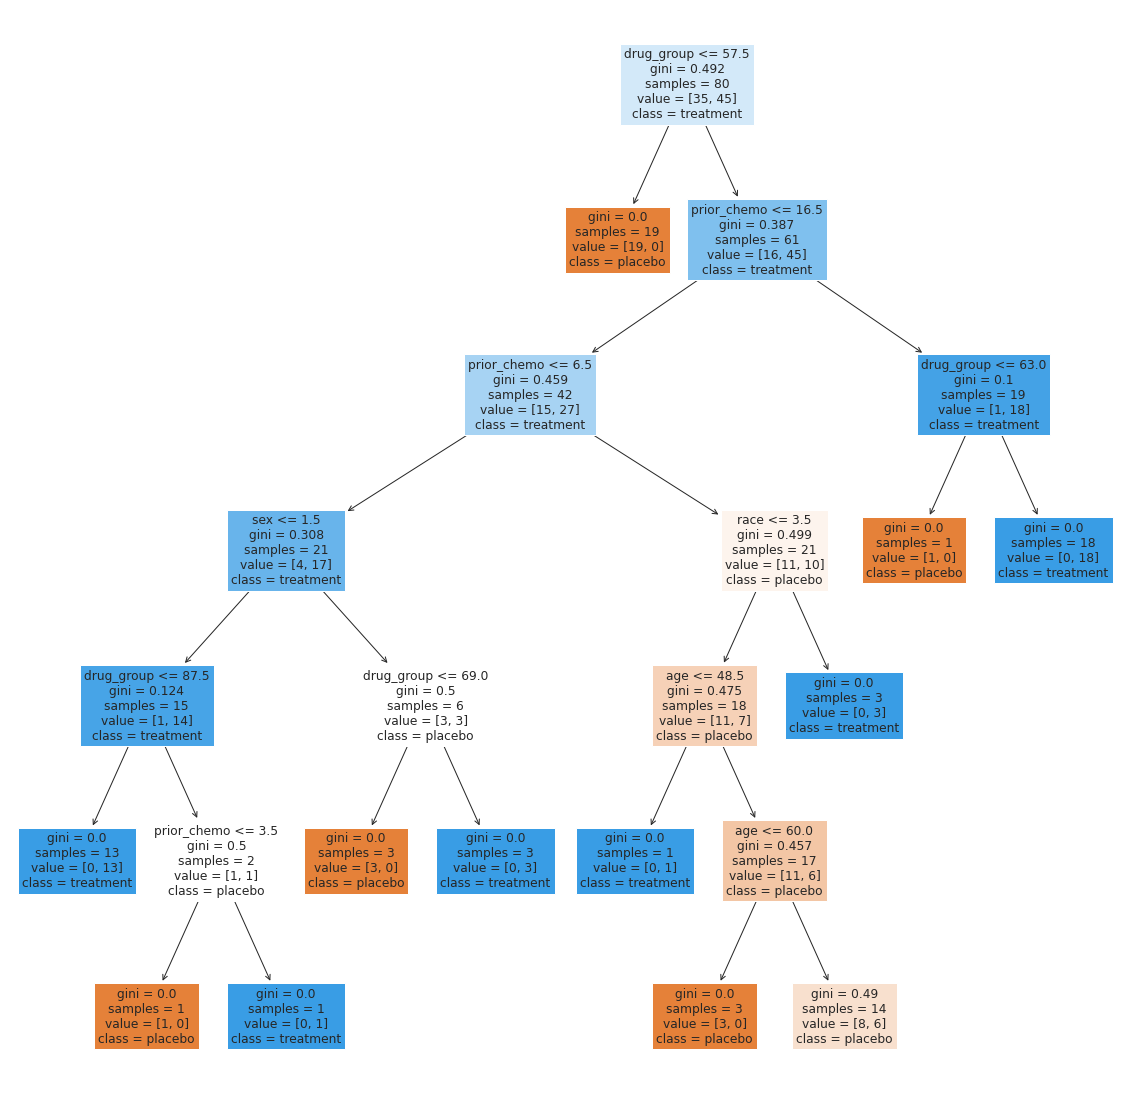

In [ ]:
#change plot size
plt.rcParams['figure.figsize'] = [100, 50]

#decision tree preparation for data 1
#separate the feature columns from the target column
features_tree = ['effective_score','sex', 'age','race','ever_smoke','overweight','ECOG','prior_rad','prior_chemo','week_in_trial']

X = np.array(cancer.drop(['drug_group'], 1))
y = np.array(cancer['drug_group'])

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

#decision tree for data 1
#create the actual decision tree
dtree = DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(X_train,y_train)

#tree.plot_tree(dtree, feature_names=features_tree)

y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
y_train_pred

#without pruning
plt.figure(figsize=(20,20))
features = cancer.columns
classes = ['placebo','treatment']
tree.plot_tree(dtree,feature_names=features_tree,class_names=classes,filled=True)
plt.show()

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

#pre
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

#post
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

plt.figure(figsize=(20,20))
features = cancer.columns
classes = ['placebo','treatment']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()



In [ ]:
# Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 27.42095


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


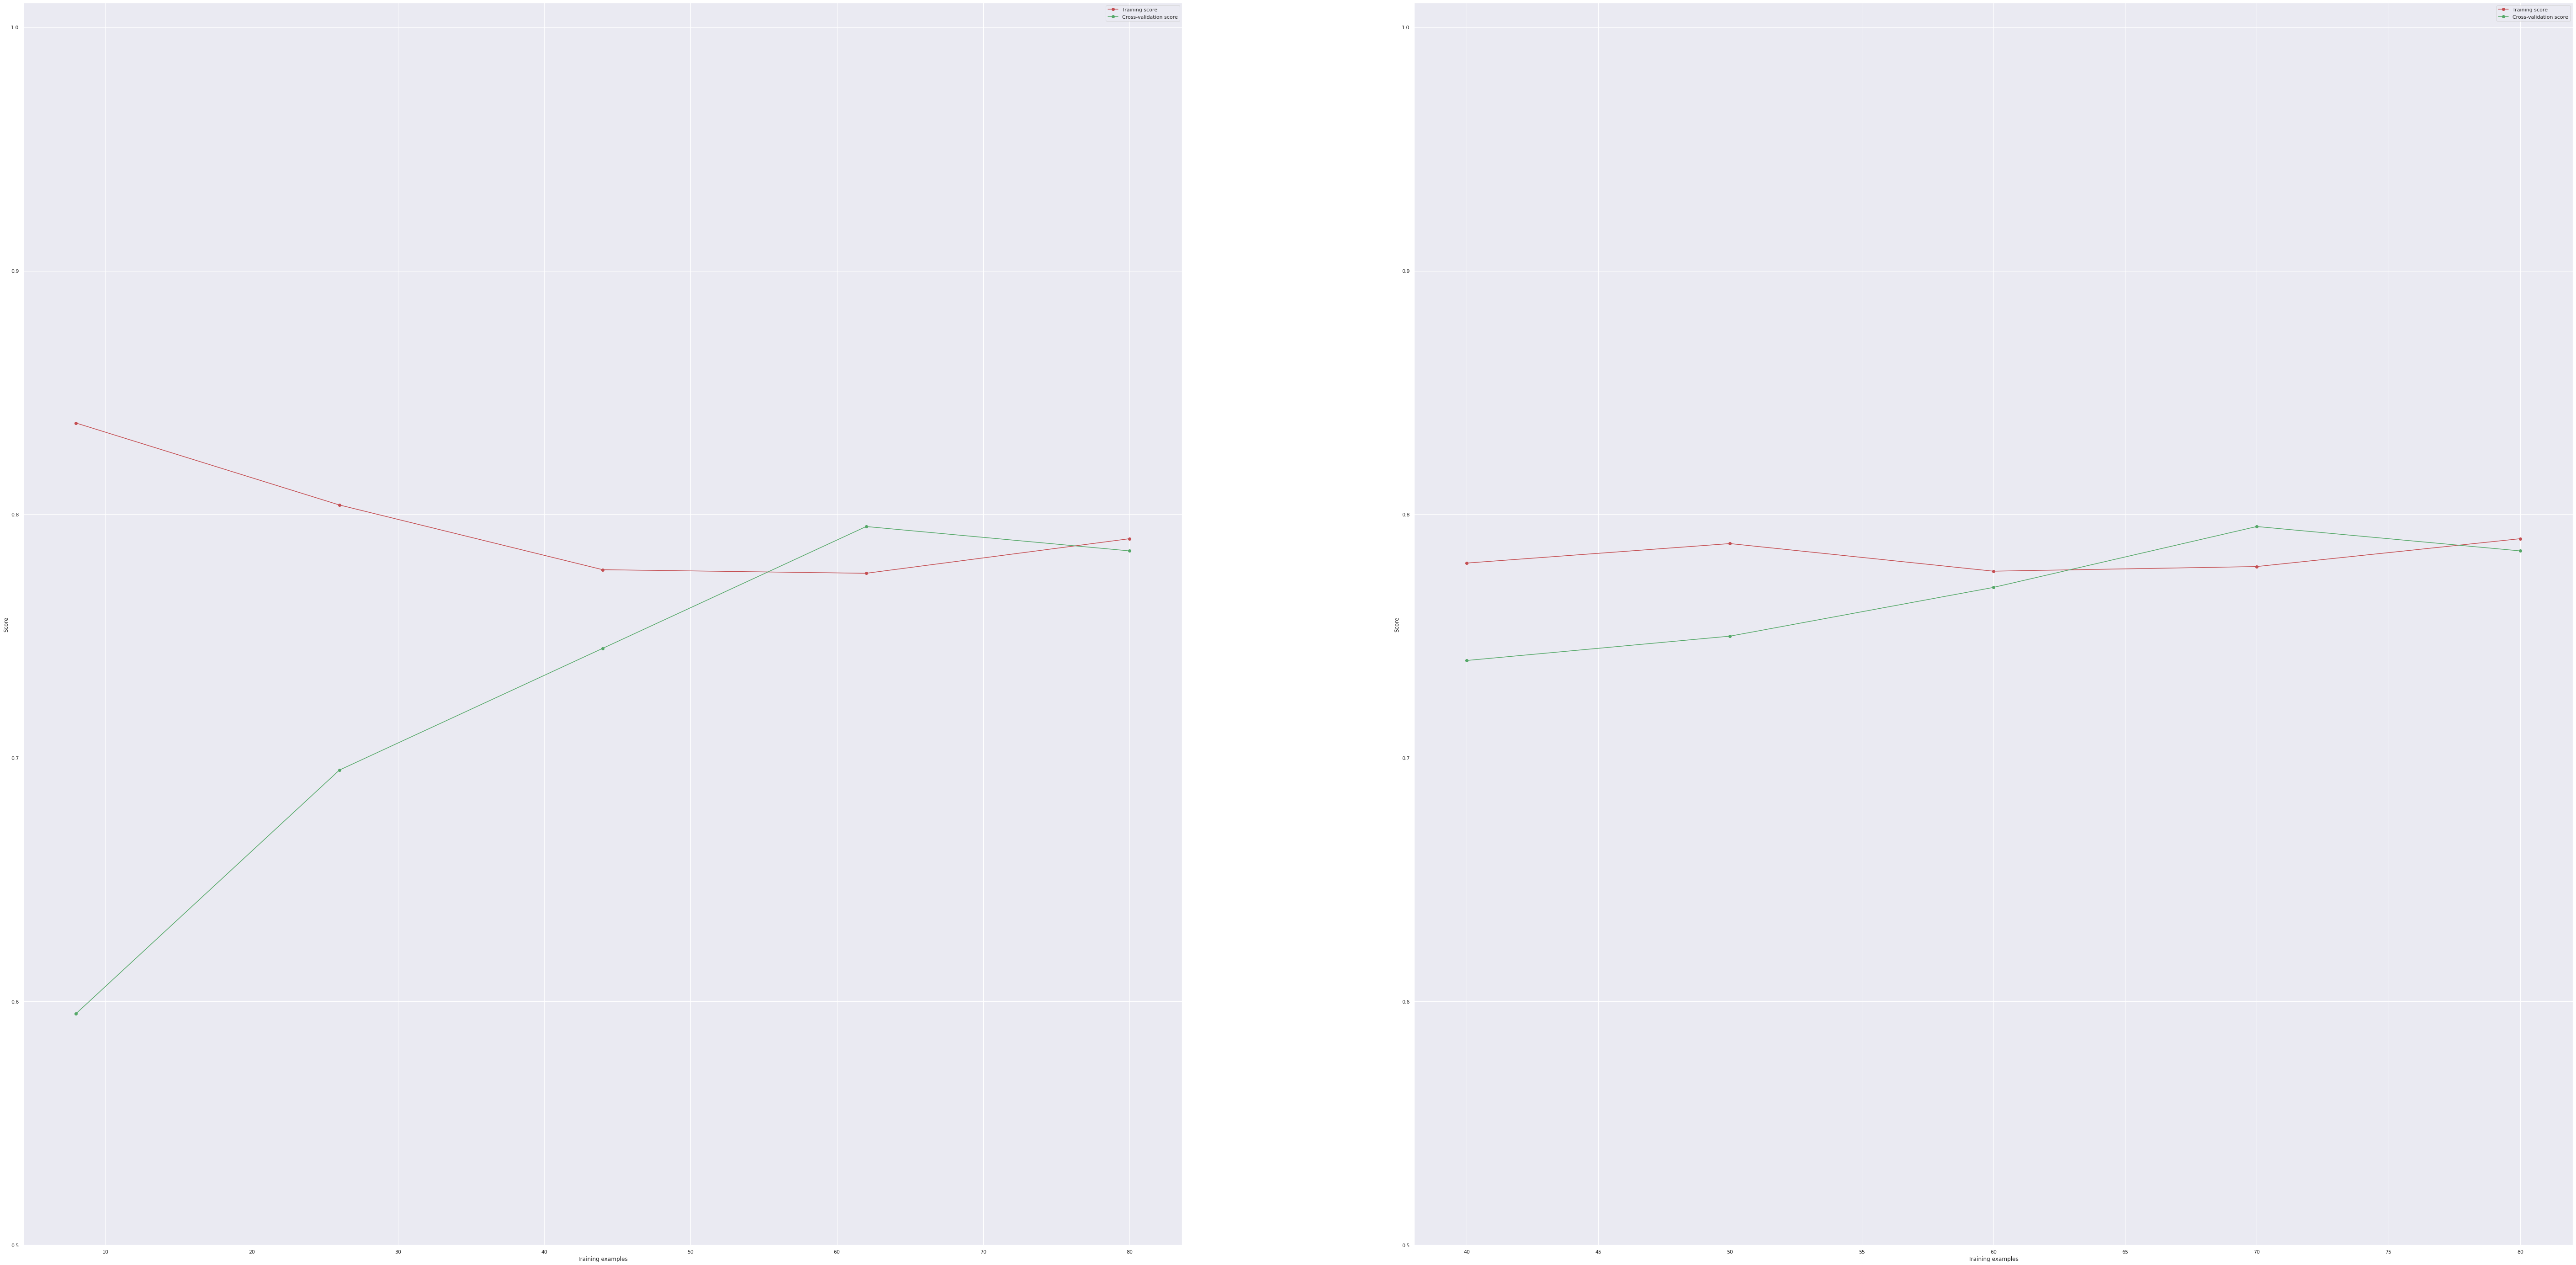

In [ ]:
def plot_learning_curve(estimator, X, y, ax=None, ylim=(0.5, 1.01), cv=None, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="best")
    return plt

fig, (ax1, ax2) = plt.subplots(1, 2)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC()
plot_learning_curve(estimator, X, y, ax = ax1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))
plt.show()


Neural networks

In [ ]:
#data 1
X = np.array(cancer.drop(['drug_group'], 1))
y = np.array(cancer['drug_group'])

cancer['drug_group']

mean = X.mean(axis=0)
X = X - mean
std = X.std(axis=0)
X /= std

# create X and Y datasets for training
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

y_train.shape

# convert the data to categorical labels

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

X_train[0]

#data 1 use this
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    #change input_dim as needed
    model.add(Dense(16, input_dim=10, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(optimizer='adam',loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


(80, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 330
Trainable params: 330
Non-trainable params: 0
_________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 25ms/step - loss: 0.6933 - accuracy: 0.5125 - val_loss: 0.6896 - val_accuracy: 0.6500
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5875 - val_loss: 0.6885 - val_accuracy: 0.6500
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.7125 - val_loss: 0.6870 - val_accuracy: 0.7000
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.7250 - val_loss: 0.6856 - val_accuracy: 0.7000
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.7000 - val_loss: 0.6837 - val_accuracy: 0.6500
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.7250 - val_loss: 0.6810 - val_accuracy: 0.6500
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.7000 - val_loss: 0.6782 - val_accuracy: 0.6500
Epoch 8/50
8/8 [============================

In [ ]:
# Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 7.447482


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


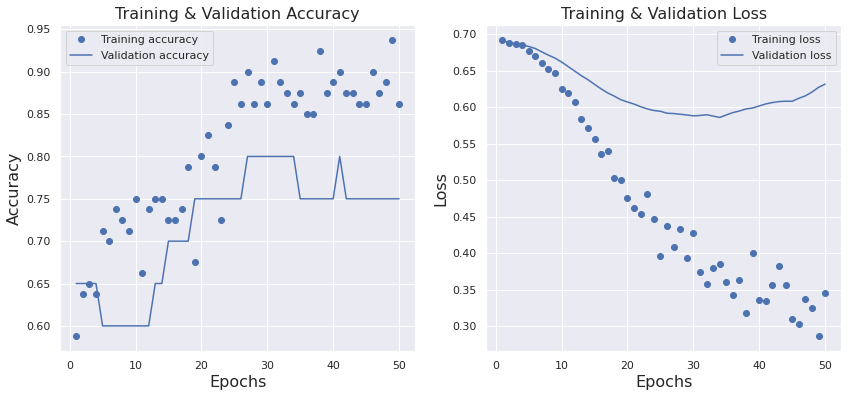

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

Boosting

[0]	validation_0-logloss:0.648566	validation_1-logloss:0.658341
[1]	validation_0-logloss:0.610805	validation_1-logloss:0.63011
[2]	validation_0-logloss:0.57838	validation_1-logloss:0.60391
[3]	validation_0-logloss:0.550338	validation_1-logloss:0.584753
[4]	validation_0-logloss:0.526173	validation_1-logloss:0.573924
[5]	validation_0-logloss:0.504243	validation_1-logloss:0.565895
[6]	validation_0-logloss:0.483523	validation_1-logloss:0.552334
[7]	validation_0-logloss:0.465322	validation_1-logloss:0.546045
[8]	validation_0-logloss:0.448523	validation_1-logloss:0.531543
[9]	validation_0-logloss:0.43403	validation_1-logloss:0.529682
[10]	validation_0-logloss:0.420112	validation_1-logloss:0.523909
[11]	validation_0-logloss:0.407361	validation_1-logloss:0.512977
[12]	validation_0-logloss:0.393151	validation_1-logloss:0.50701
[13]	validation_0-logloss:0.378961	validation_1-logloss:0.496136
[14]	validation_0-logloss:0.369208	validation_1-logloss:0.487783
[15]	validation_0-logloss:0.355882	valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


[16]	validation_0-logloss:0.346391	validation_1-logloss:0.486572
[17]	validation_0-logloss:0.335811	validation_1-logloss:0.485144
[18]	validation_0-logloss:0.326354	validation_1-logloss:0.486774
[19]	validation_0-logloss:0.316859	validation_1-logloss:0.476388
[20]	validation_0-logloss:0.307111	validation_1-logloss:0.47703
[21]	validation_0-logloss:0.298078	validation_1-logloss:0.479745
[22]	validation_0-logloss:0.290227	validation_1-logloss:0.475699
[23]	validation_0-logloss:0.284001	validation_1-logloss:0.482048
[24]	validation_0-logloss:0.276669	validation_1-logloss:0.47964
[25]	validation_0-logloss:0.270859	validation_1-logloss:0.471566
[26]	validation_0-logloss:0.265372	validation_1-logloss:0.472576
[27]	validation_0-logloss:0.26104	validation_1-logloss:0.475616
[28]	validation_0-logloss:0.253799	validation_1-logloss:0.474335
[29]	validation_0-logloss:0.248172	validation_1-logloss:0.472851
[30]	validation_0-logloss:0.243662	validation_1-logloss:0.477937
[31]	validation_0-logloss:0.

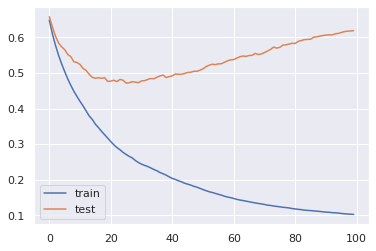

In [ ]:
#data 1
X = np.array(cancer.drop(['drug_group'], 1))
y = np.array(cancer['drug_group'])

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# define the model
model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 7.948847


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
'''
#fit model on training data using GradientBoosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

print(model)

#make predictions for test data
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

#make predictions for test data
y_pred = model_XGB.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accurara: %.2f%%" % (accuracy * 100.0))
'''

GradientBoostingClassifier()
Accurara: 80.00%


Support Vector Machines

In [ ]:
#data 1
X = np.array(cancer.drop(['drug_group'], 1))
y = np.array(cancer['drug_group'])

#separate data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

#use kernal linear
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred_linear = svclassifier.predict(X_test)

#print(confusion_matrix(y_test,y_pred_linear))
print(classification_report(y_test,y_pred_linear))

#use kernal polynomial
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

y_pred_poly = svclassifier.predict(X_test) 

#print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
 # Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 4.723108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


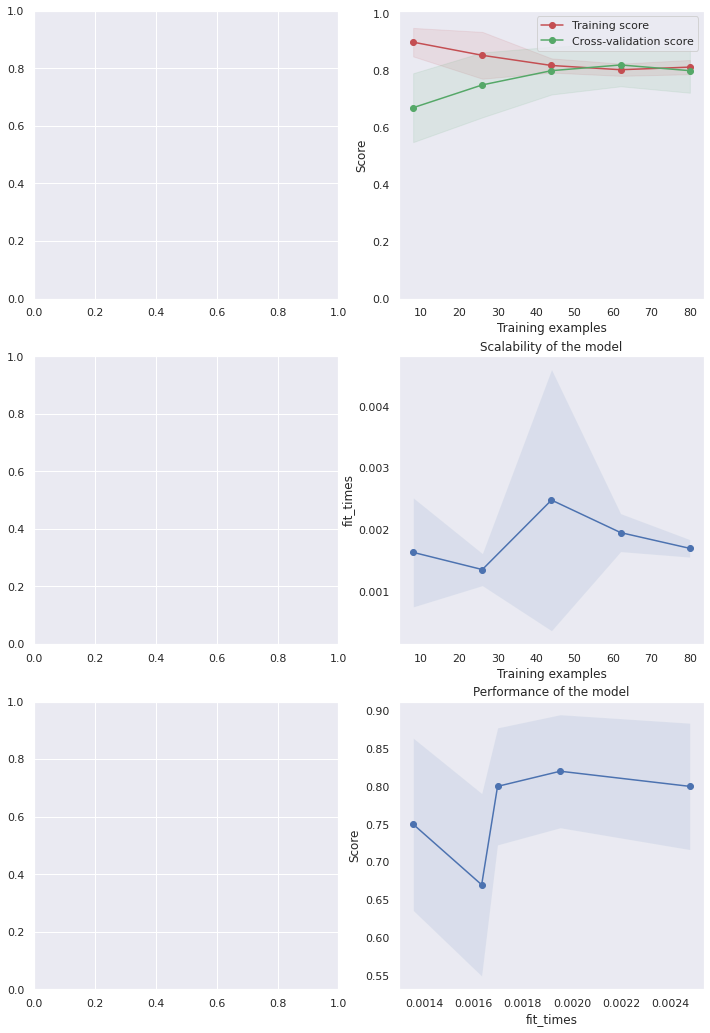

In [ ]:

def plot_learning_curve(
    estimator,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

fig, axes = plt.subplots(3, 2, figsize=(12, 18))
X = np.array(cancer.drop(['drug_group'], 1))
y = np.array(cancer['drug_group'])


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, X, y, axes=axes[:, 1], ylim=(0, 1.01), cv=cv, n_jobs=4
)

plt.show()

K-nearest Neighbour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


[0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1]


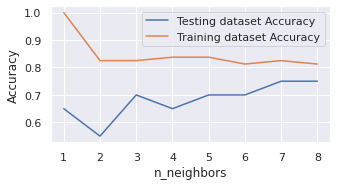

array([1.    , 0.825 , 0.825 , 0.8375, 0.8375, 0.8125, 0.825 , 0.8125])

In [ ]:
#data 1
X = np.array(cancer.drop(['drug_group'], 1))
y = np.array(cancer['drug_group'])

#separating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

#change plot size
plt.rcParams['figure.figsize'] = [5, 2.5]

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(figsize=(12, 18))

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

test_accuracy
train_accuracy
# k = 6 or 7 shows the best estimate

In [ ]:
 # Get the current processor
# time in seconds
pro_time = time.clock()
# print the current 
# processor time
print("Current processor time (in seconds):", pro_time)

Current processor time (in seconds): 7.332266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
